In [16]:
import numpy as np
import pandas as pd 

AttributeError: module 'pandas' has no attribute '_libs'

In [14]:
!pip install bar_chart_race

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
sns.set_context('notebook')
import datetime
import requests
import warnings
from IPython.display import HTML
import bar_chart_race as bcr
warnings.filterwarnings('ignore')

In [17]:
ageGroup=pd.read_csv('AgeGroupDetails.csv')
covid19_india=pd.read_csv('covid_19_india.csv')
hospital_beds=pd.read_csv('HospitalBedsIndia.csv')
icmrtest_lab=pd.read_csv('ICMRTestingLabs.csv')
indiDetails=pd.read_csv('IndividualDetails.csv')
india_cesnus=pd.read_csv('population_india_census2011.csv')
state_details=pd.read_csv('StatewiseTestingDetails.csv')

NameError: name 'pd' is not defined

# Timeline for the Global spread of COVID 19

In [40]:
corona_data=pd.read_csv('covid_19_data.csv')

In [41]:
choro_map=px.choropleth(corona_data, locations="Country/Region", locationmode="country names", color="Confirmed",
                       hover_name="Country/Region", animation_frame="ObservationDate")
choro_map.update_layout(
    title_text='Global Spread of Coronavirus',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
    ))
choro_map.show()

# COVID 19 IN INDIA

In [42]:
covid19_india=pd.read_csv('covid_19_india.csv',index_col='Date')

In [43]:
covid19_india

Sno     Time State/UnionTerritory ConfirmedIndianNational  \
Date                                                                   
30/01/20     1  6:00 PM               Kerala                       1   
31/01/20     2  6:00 PM               Kerala                       1   
01/02/20     3  6:00 PM               Kerala                       2   
02/02/20     4  6:00 PM               Kerala                       3   
03/02/20     5  6:00 PM               Kerala                       3   
...        ...      ...                  ...                     ...   
18/08/20  5332  8:00 AM            Telengana                       -   
18/08/20  5333  8:00 AM              Tripura                       -   
18/08/20  5334  8:00 AM          Uttarakhand                       -   
18/08/20  5335  8:00 AM        Uttar Pradesh                       -   
18/08/20  5336  8:00 AM          West Bengal                       -   

         ConfirmedForeignNational   Cured  Deaths  Confirmed  
Date                                                          
30/01/20                        0       0       0          1  
31/01/20                        0       0       0          1  
01/02/20                        0       0       0          2  
02/02/20                        0       0       0          3  
03/02/20                        0       0       0          3  
...                           ...     ...     ...        ...  
18/08/20                        -   72202     711      93937  
18/08/20                        -    5404      62       7409  
18/08/20                        -    8485     158      12493  
18/08/20                        -  104808    2515     158216  
18/08/20                        -   89703    2473     119578  

[5336 rows x 8 columns]

In [44]:
df_cases=covid19_india.loc[:,['State/UnionTerritory','Confirmed']]

In [45]:
df_cases

State/UnionTerritory  Confirmed
Date                                    
30/01/20               Kerala          1
31/01/20               Kerala          1
01/02/20               Kerala          2
02/02/20               Kerala          3
03/02/20               Kerala          3
...                       ...        ...
18/08/20            Telengana      93937
18/08/20              Tripura       7409
18/08/20          Uttarakhand      12493
18/08/20        Uttar Pradesh     158216
18/08/20          West Bengal     119578

[5336 rows x 2 columns]

In [46]:
df_cases.reset_index(inplace=True)

In [47]:
df_cases

Date State/UnionTerritory  Confirmed
0     30/01/20               Kerala          1
1     31/01/20               Kerala          1
2     01/02/20               Kerala          2
3     02/02/20               Kerala          3
4     03/02/20               Kerala          3
...        ...                  ...        ...
5331  18/08/20            Telengana      93937
5332  18/08/20              Tripura       7409
5333  18/08/20          Uttarakhand      12493
5334  18/08/20        Uttar Pradesh     158216
5335  18/08/20          West Bengal     119578

[5336 rows x 3 columns]

In [48]:
df_cases['Date']=pd.to_datetime(df_cases['Date'],format="%d/%m/%y")

# Active cases, deaths and recovered cases

In [49]:
df_confirmed_deaths_cured=covid19_india.loc[:, ['State/UnionTerritory','Confirmed','Deaths','Cured']]
df_confirmed_deaths_cured.index=pd.to_datetime(df_confirmed_deaths_cured.index,format="%d/%m/%y")
df_confirmed_deaths_cured.tail()

State/UnionTerritory  Confirmed  Deaths   Cured
Date                                                      
2020-08-18            Telengana      93937     711   72202
2020-08-18              Tripura       7409      62    5404
2020-08-18          Uttarakhand      12493     158    8485
2020-08-18        Uttar Pradesh     158216    2515  104808
2020-08-18          West Bengal     119578    2473   89703

In [50]:
df1=df_confirmed_deaths_cured.reset_index()

In [51]:
df1=df1.groupby('Date').sum()
df1.reset_index(inplace=True)
df2=df1.tail(25)

In [52]:
df2

Date  Confirmed  Deaths    Cured
177 2020-07-25    1336861   31358   849432
178 2020-07-26    1385522   32063   885577
179 2020-07-27    1435453   32771   917568
180 2020-07-28    1483156   33425   952743
181 2020-07-29    1531669   34193   988029
182 2020-07-30    1583792   34968  1020582
183 2020-07-31    1638870   35747  1057805
184 2020-08-01    1695988   36511  1094374
185 2020-08-02    1750723   37364  1145629
186 2020-08-03    1803695   38135  1186203
187 2020-08-04    1855745   38938  1230509
188 2020-08-05    1908254   39795  1282215
189 2020-08-06    1964536   40699  1328336
190 2020-08-07    2027074   41585  1378105
191 2020-08-08    2088611   42518  1427005
192 2020-08-09    2153010   43379  1480884
193 2020-08-10    2215074   44386  1535743
194 2020-08-11    2268675   45257  1583489
195 2020-08-12    2329638   46091  1639599
196 2020-08-13    2396637   47033  1695982
197 2020-08-14    2461190   48040  1751555
198 2020-08-15    2526192   49036  1808936
199 2020-08-16    2589682   49980  1862258
200 2020-08-17    2647663   50921  1919842
201 2020-08-18    2702742   51797  1977779

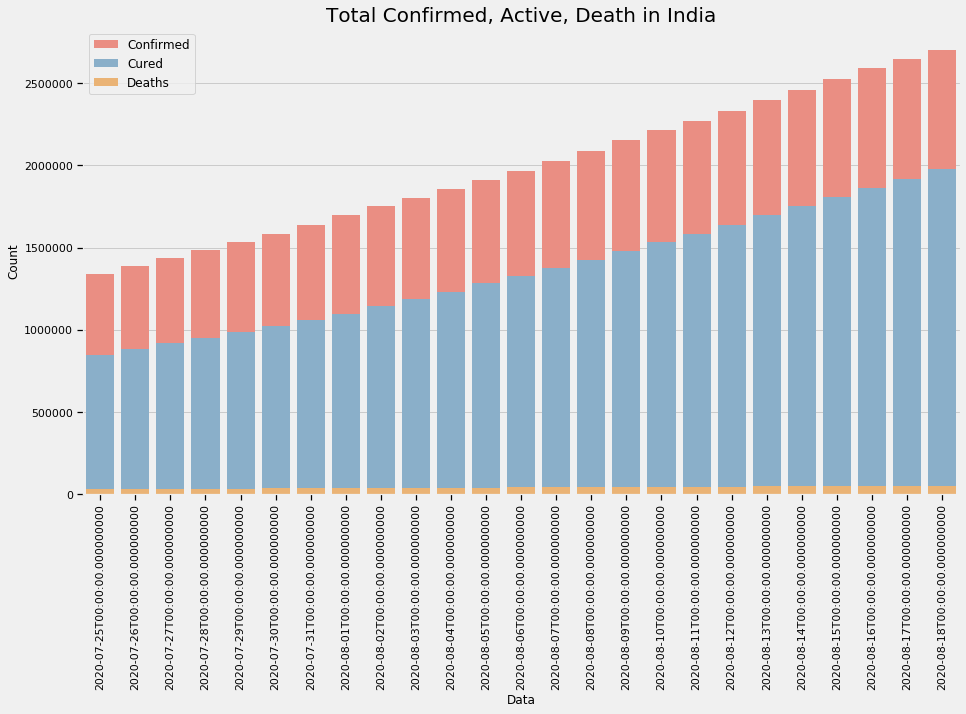

In [53]:
plt.figure(figsize=(14,8))
sns.barplot(data=df2,x='Date',y='Confirmed',color=sns.color_palette('Set3')[3],label='Confirmed')
sns.barplot(data=df2,x='Date',y='Cured',color=sns.color_palette('Set3')[4],label='Cured')
sns.barplot(data=df2,x='Date',y='Deaths',color=sns.color_palette('Set3')[5],label='Deaths')
plt.xlabel('Data')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)
plt.legend(frameon=True,fontsize=12)

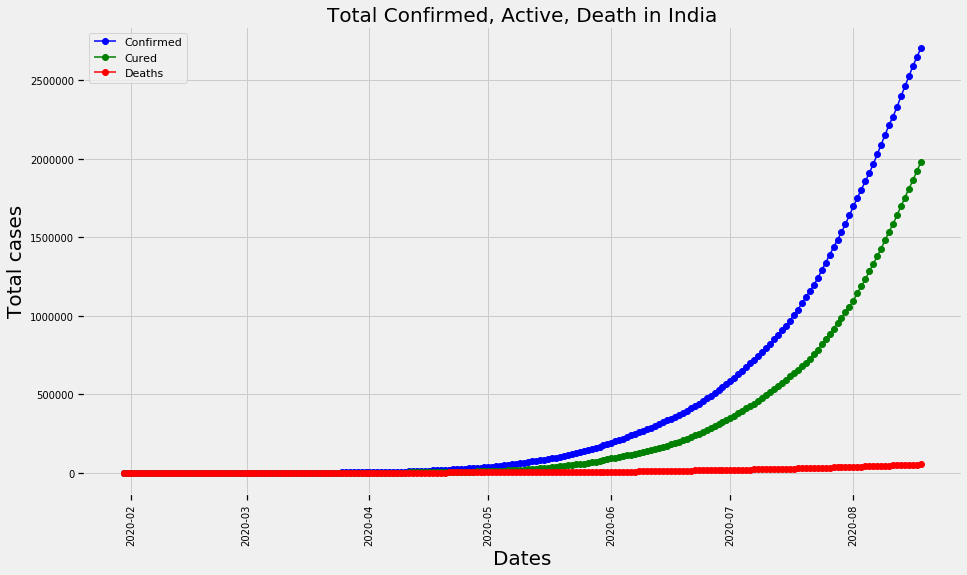

In [54]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Dates',fontsize=20)
plt.ylabel("Total cases",fontsize=20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)
ax1=plt.plot_date(data=df1,y='Confirmed',x='Date',label='Confirmed',linestyle='-',color='b')
ax2=plt.plot_date(data=df1, y='Cured',x='Date',label='Cured',linestyle='-',color='g')
ax3=plt.plot_date(data=df1,y='Deaths',x='Date',label='Deaths',linestyle='-',color='r')
plt.legend()

# Statewise Death Rate and Cure Rate

In [55]:
state_cases=df_confirmed_deaths_cured.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active']=state_cases['Confirmed']- abs((state_cases['Deaths']- state_cases['Cured']))
state_cases['Death Rate (per 100)']=np.round(100*state_cases['Deaths']/state_cases['Confirmed'],2)
state_cases['Cure Rate (per 100)']=np.round(100*state_cases['Cured']/state_cases['Confirmed'],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Reds',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Greys',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Oranges',subset=["Cure Rate (per 100)"])


# Age group analysis

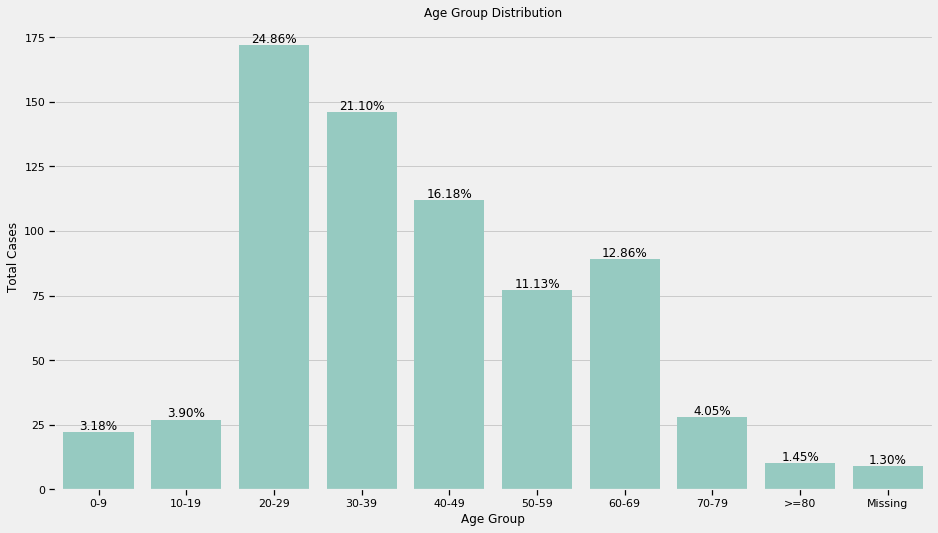

In [56]:
plt.figure(figsize=(14,8))
sns.barplot(data=ageGroup,x='AgeGroup',y='TotalCases',color=sns.color_palette('Set3')[0])
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Total Cases')
for i in range(ageGroup.shape[0]):
    count = ageGroup.iloc[i]['TotalCases']
    plt.text(i,count+1,ageGroup.iloc[i]['Percentage'],ha='center')
    
from IPython.display import display, Markdown